## Toxic Comment Exploration Notebook 
* Loading the Data 
* Running essential EDA 
* Word Cloud Visualization 
* Knowldage Graph Visualization 


### Loading the Data

In [1]:
#!pip install wordcloud
#!pip install nltk
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!pip install networkx

In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import csv

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load in the dataframe
df = pd.read_csv('hm_data/toxic_data/train.csv')
#df = pd.read_csv("../input/jigsaw-toxic-comment-classification-challenge/train.csv")

### Running essential EDA 

In [4]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
print("**Sample data:**")
df.head()


Number of rows in data = 159571
Number of columns in data = 8


**Sample data:**


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} words in this dataset such as {}... \n".format(len(df.comment_text.unique()),
                                                                           ", ".join(df.comment_text.unique()[0:1])))


There are 159571 observations and 8 features in this dataset. 

There are 159571 words in this dataset such as Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27... 



In [6]:
df[["comment_text"]].head()

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."


Now we count the number of comments under each label. (For detailed code, please refer to the GitHub link of this project.)

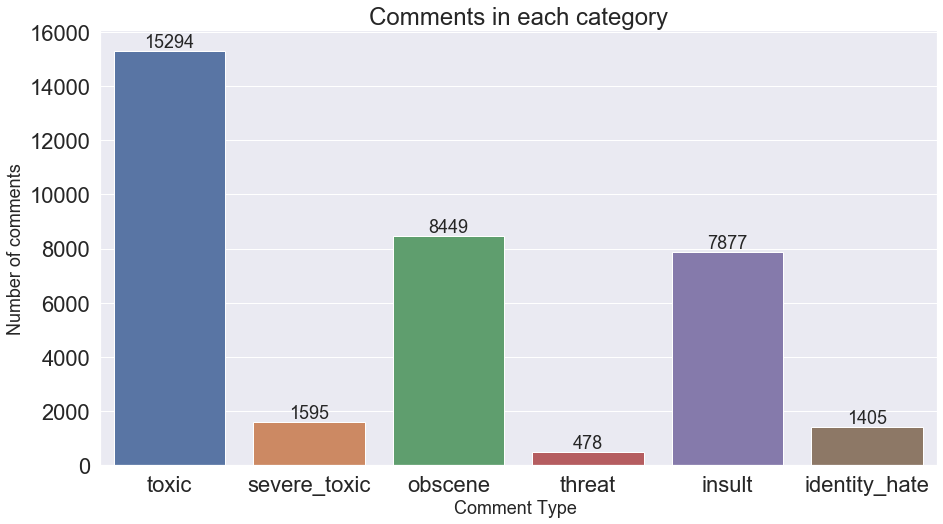

In [7]:
categories = list(df.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories[2:], df.iloc[:,2:].sum().values)
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = df.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

Counting the number of comments having multiple labels.

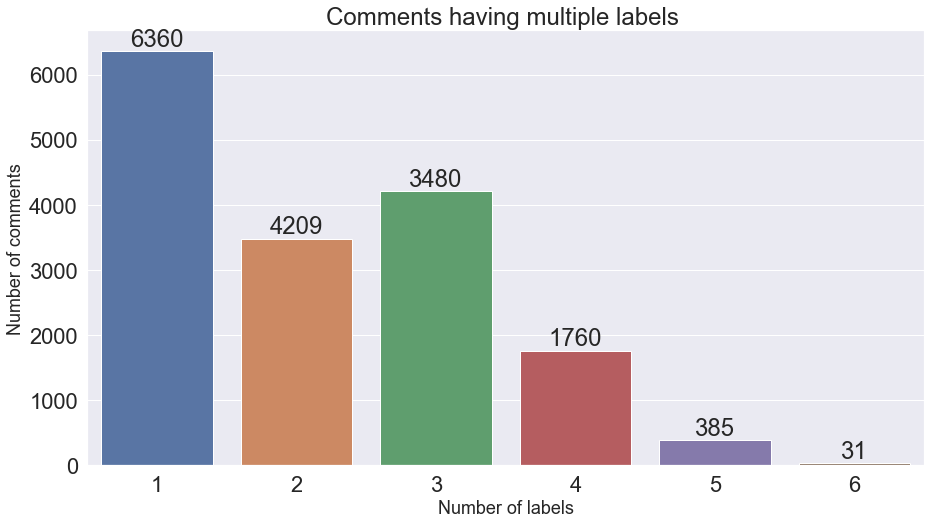

In [8]:
rowSums = df.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

### Word Cloud visualization 

WordCloud representation of most used words in each category of comments.

#### Utility functions for text cleaning 

In [4]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
def clean(s): return re_tok.sub(r' \1 ', s)

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = df
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)

In [6]:
df_saved = df.copy()
df = data.copy()

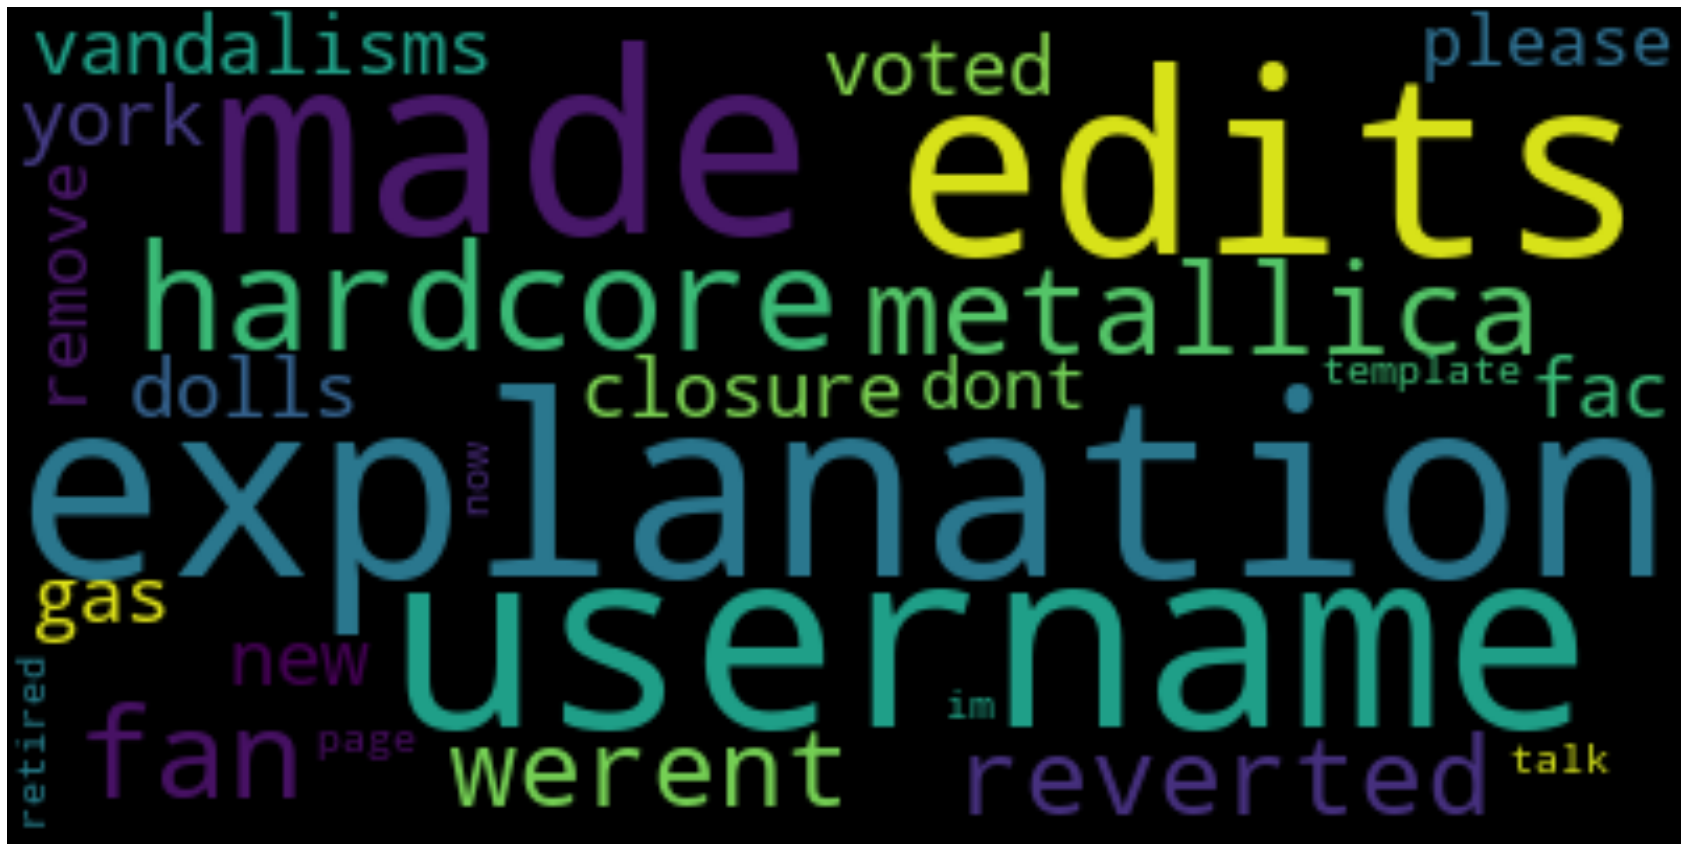

In [12]:
# Start with one review:
text = df.comment_text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated image:
plt.figure(figsize=(30,50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
## decide vocab size
text = df['comment_text']
words = []
for t in text:
    words.extend(tokenize(t))
print(words[:100])
vocab = list(set(words))
print(len(words), len(vocab))

['explanation', 'why', 'the', 'edits', 'made', 'under', 'my', 'username', 'hardcore', 'metallica', 'fan', 'were', 'reverted', 'they', 'werent', 'vandalisms', 'just', 'closure', 'on', 'some', 'gas', 'after', 'i', 'voted', 'at', 'new', 'york', 'dolls', 'fac', 'and', 'please', 'dont', 'remove', 'the', 'template', 'from', 'the', 'talk', 'page', 'since', 'im', 'retired', 'now', 'daww', 'he', 'matches', 'this', 'background', 'colour', 'im', 'seemingly', 'stuck', 'with', 'thanks', 'talk', 'january', 'utc', 'hey', 'man', 'im', 'really', 'not', 'trying', 'to', 'edit', 'war', 'its', 'just', 'that', 'this', 'guy', 'is', 'constantly', 'removing', 'relevant', 'information', 'and', 'talking', 'to', 'me', 'through', 'edits', 'instead', 'of', 'my', 'talk', 'page', 'he', 'seems', 'to', 'care', 'more', 'about', 'the', 'formatting', 'than', 'the', 'actual', 'info', 'more']
10683054 177425


In [14]:
words_str1 = ' '.join(str(e) for e in words)

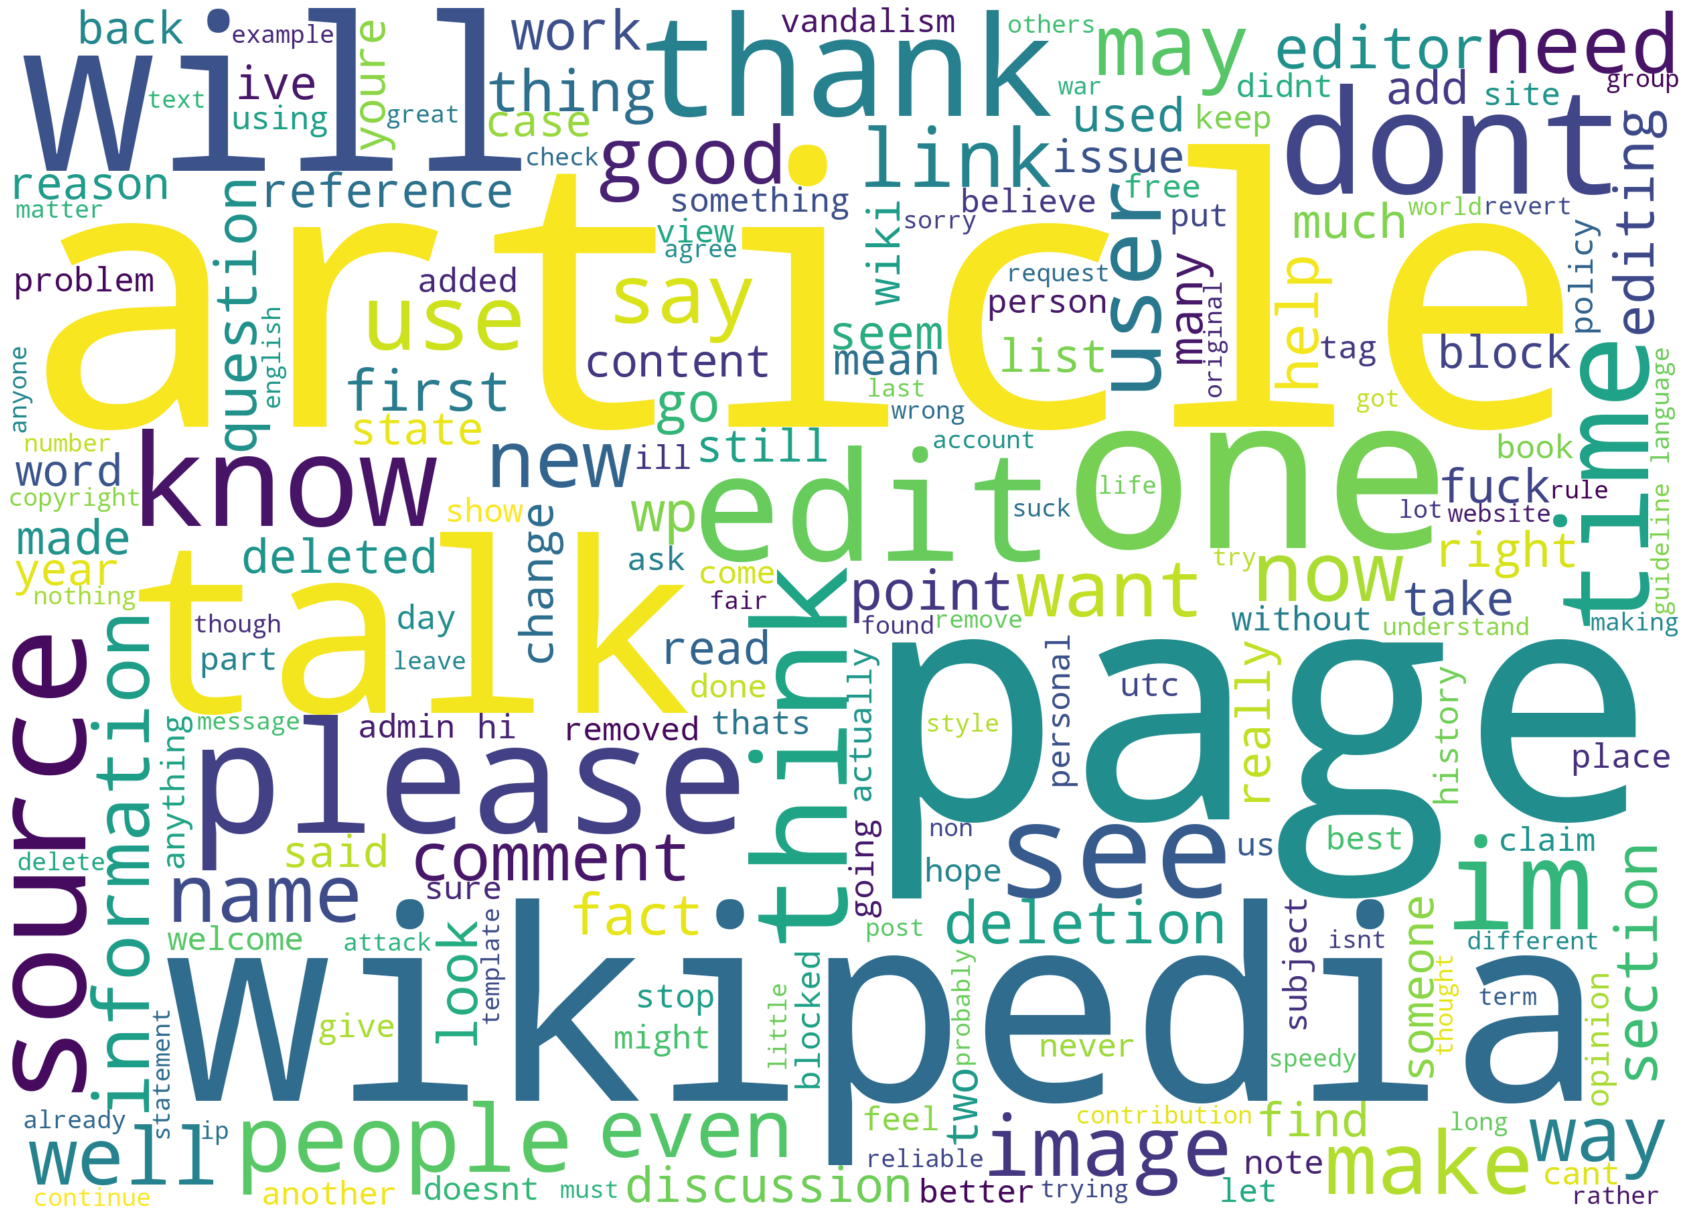

In [15]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          collocations=False,
                          width=2500,
                          height=1800, background_color="white").generate(words_str1)
plt.figure(figsize=(30,50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Knowledge Graph Visualization 

In [7]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

from tqdm import tqdm

In [8]:
candidate_sentences = df['comment_text']
candidate_sentences.shape

(159571,)

In [9]:
doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

The ... det
22-year ... npadvmod
- ... punct
old ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


In [10]:
doc = nlp("Nagal won the first set.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

Nagal ... nsubj
won ... ROOT
the ... det
first ... amod
set ... dobj
. ... punct


In [11]:
doc = nlp("the drawdown process is governed by astm standard d823")

for tok in doc:
  print(tok.text, "...", tok.dep_)

the ... det
drawdown ... compound
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... compound
d823 ... pobj


#### Entity Pairs Extraction

In [52]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################
  if ent1 is None or ent2 is None:
        ret = ['','']
  else:
        ret = [ent1.strip(), ent2.strip()]
  return ret

In [53]:
get_entities("the film had 200 patents")

['film', '200  patents']

In [54]:
entity_pairs = []

for i in tqdm(candidate_sentences):
  entity_pairs.append(get_entities(i))

100%|██████████████████████████████████████████████████████████████████████████| 159571/159571 [37:52<00:00, 70.23it/s]


In [66]:
## save paires
filename = 'hm_data/toxic_data/entity_pairs.csv'
import csv
with open(filename, 'w') as f:
   writer = csv.writer(f, delimiter=',')
   writer.writerows(entity_pairs)  #considering my_list is a list of lists.

In [67]:
## load paires 
l_entity_pairs = []
#e_file = "../input/saved-relations/entity_pairs.csv" ## read preloaded entity_paires
e_file = "hm_data/toxic_data/entity_pairs.csv" ## read session written entity paires
with open(e_file, 'r') as csvfile:
    entity_pairs_file = csv.reader(csvfile, delimiter=',')
    for row in entity_pairs_file:
        l_entity_pairs.append(row)       
entity_pairs = l_entity_pairs

In [68]:
entity_pairs[10:20]

[['', 'well  tools'],
 [],
 ['you', 'around  work'],
 [],
 ['again matt shirvington you', 'matt shirvington it'],
 [],
 ['messy  that', 'around  eugenics'],
 [],
 ['which', 'dulithgow'],
 []]

### Relation / Predicate Extraction

In [16]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1
    
  try:
    span = doc[matches[k][1]:matches[k][2]]
    ret = span.text
  except IndexError:
    span = 'null'
    ret = ''

  return(ret)

In [17]:
 relations = [get_relation(i) for i in tqdm(candidate_sentences)]

100%|██████████████████████████████████████████████████████████████████████████| 159571/159571 [33:36<00:00, 79.13it/s]


In [18]:
## print the sum of None values in relations 
print(sum(x is not None for x in relations))

159563


In [37]:
## save paires
filename = 'hm_data/toxic_data/relations.csv'
import csv
with open(filename, 'w') as f:
   writer = csv.writer(f, delimiter=',')
   writer.writerows(relations)  #considering my_list is a list of lists. 
   #writer.writerow(relations)  #considering my_list is a list of lists. 
        

In [38]:
## load relations 
#e_file = "../input/saved-relations/relations.csv" ## read preloaded entity_paires
e_file = "hm_data/toxic_data/relations.csv" ## read session written entity paires
l_relations = []
with open(e_file, 'r') as csvfile:
    relations_file = csv.reader(csvfile, delimiter=',')
    for row in relations_file:
        l_relations.append(row)
        #l_relations.append(''.join(row))

In [39]:
type(l_relations)

list

In [42]:
##print(relations)

In [ ]:
relations = l_relations

In [61]:
s = pd.Series(relations).value_counts()
s[:10]

is       13523
think     4383
are       3472
have      3242
see       2751
was       2272
thank     2162
know      1993
stop      1743
be        1588
dtype: int64

In [64]:
## get as much as you want from verbs and their number of links
s[s == 10]

this            10
enjoyed         10
editors         10
m sure          10
supported by    10
                ..
cross           10
is useless      10
express         10
move to         10
leads           10
Length: 98, dtype: int64

### Build a Knowledge Graph

In [57]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [58]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [ ]:
#plt.figure(figsize=(12,12))

#pos = nx.spring_layout(G)
#nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
#plt.show()

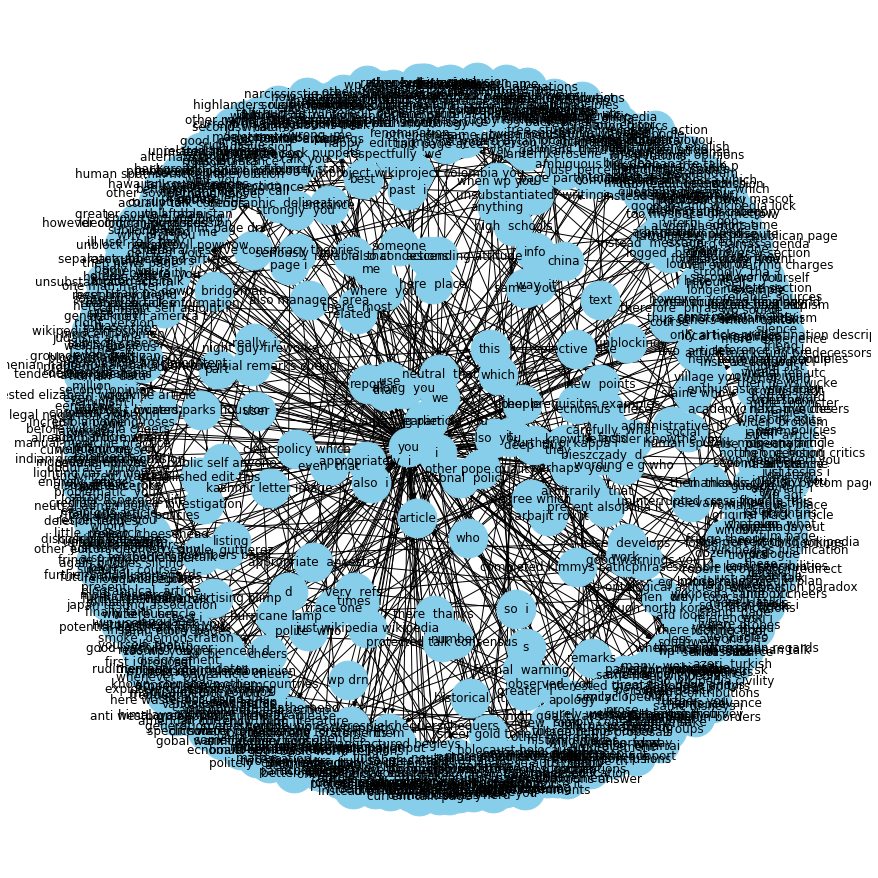

In [59]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="suggest"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

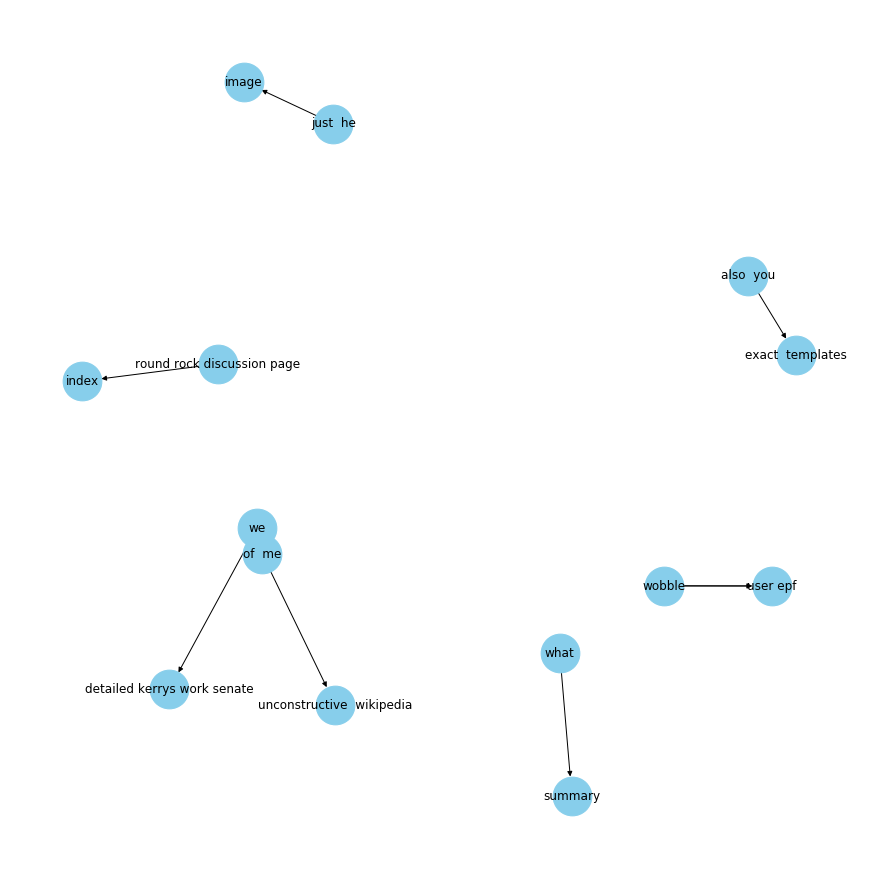

In [63]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="located"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

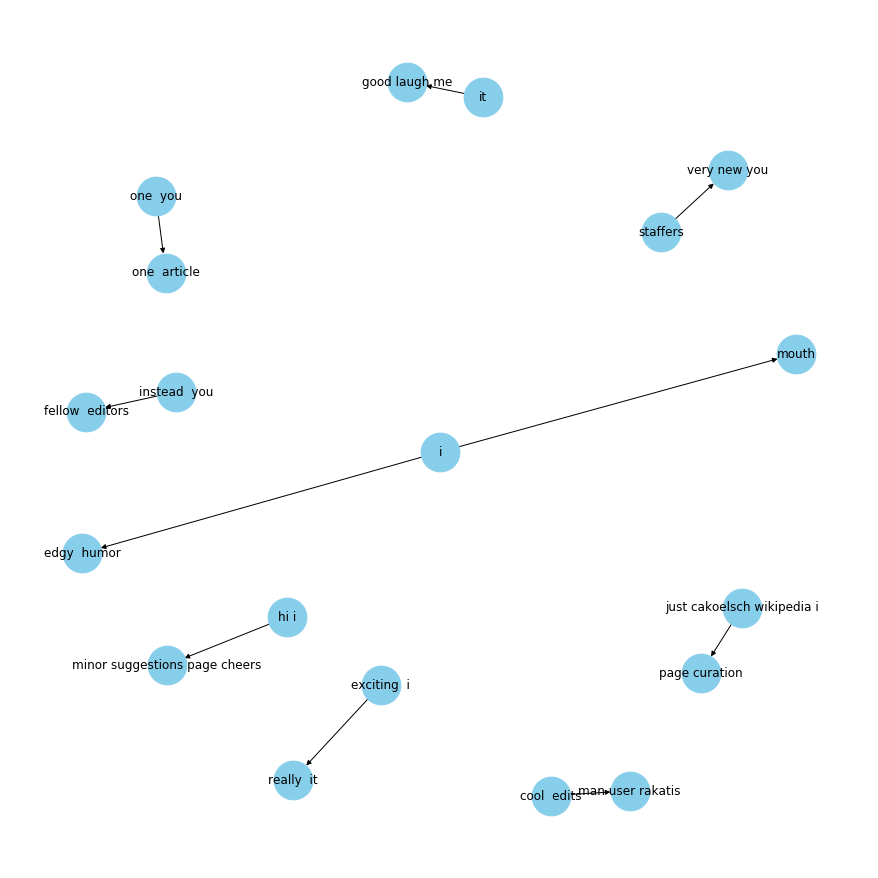

In [65]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="enjoyed"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()